<h1 style="font-size: 1.6rem; font-weight: bold">ITO 5047: Fundamentals of Artificial Intelligence</h1>
<h1 style="font-size: 1.6rem; font-weight: bold">Deep Artificial Neural Networks</h1>
<p style="margin-top: 5px; margin-bottom: 5px;">Monash University Australia</p>
<p style="margin-top: 5px; margin-bottom: 5px;">Jupyter Notebook by: Tristan Sim Yook Min</p>
References: Information Source from Monash Faculty of Information Technology

---

Deep ANNs extend basic perceptrons by adding hidden layers between input and output, enabling complex pattern recognition and non-linear mapping capabilities.

### **Multi-layer Feed-forward Architecture**

These networks contain hidden layers where information flows unidirectionally from input through hidden layers to output. Each layer processes input from the previous layer and sends results to the next layer, creating hierarchical feature extraction.

The critical advancement is replacing step functions with sigmoid activation functions. Sigmoid provides smooth, differentiable outputs necessary for gradient-based training algorithms. This makes each neuron a sigmoid perceptron, enabling backpropagation learning.

The network creates a functional hierarchy: output units depend on hidden units, which depend on input units.

For the example network with input vector **x** = (x₁, x₂):
* Input activations: (a₁, a₂) = (x₁, x₂)  
* Hidden unit outputs: a₃ = σ(w₁₃a₁ + w₂₃a₂ + w₃a₃), a₄ = σ(w₁₄a₁ + w₂₄a₂ + w₄a₄)
* Final output: a₅ = σ(w₃₅a₃ + w₄₅a₄ + w₅a₅)

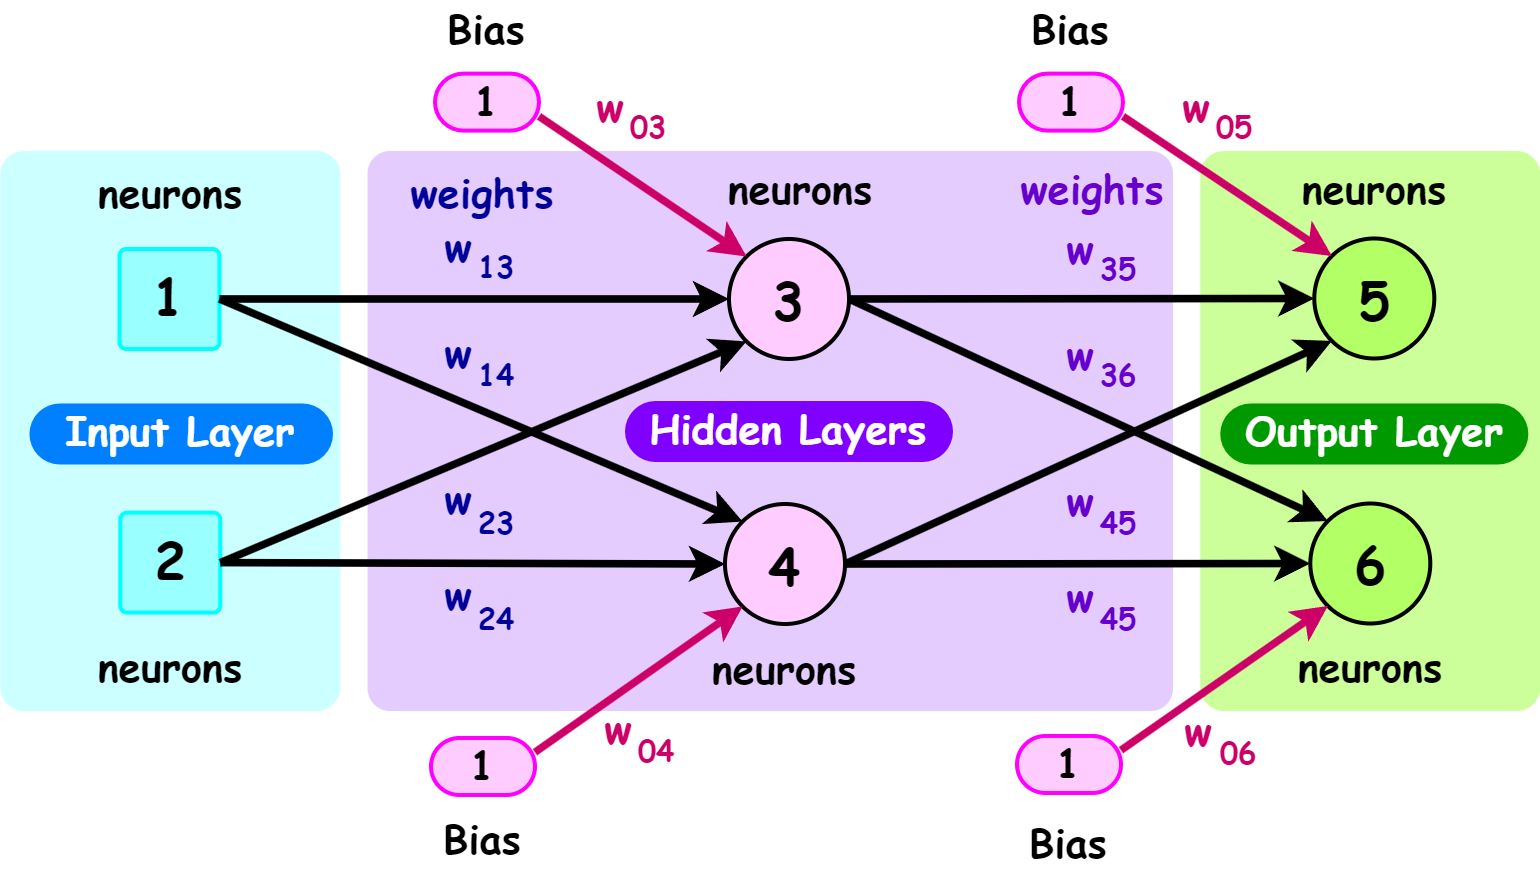

### **Sigmoid Activation Function**

The sigmoid function provides smooth activation:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Its derivative, essential for backpropagation:

$$\sigma'(z) = \sigma(z)(1 - \sigma(z))$$

### **Network Expressiveness**

Sigmoid activation with smooth thresholds allows multi-layer networks to approximate complex functions through hierarchical combinations of simple threshold functions.

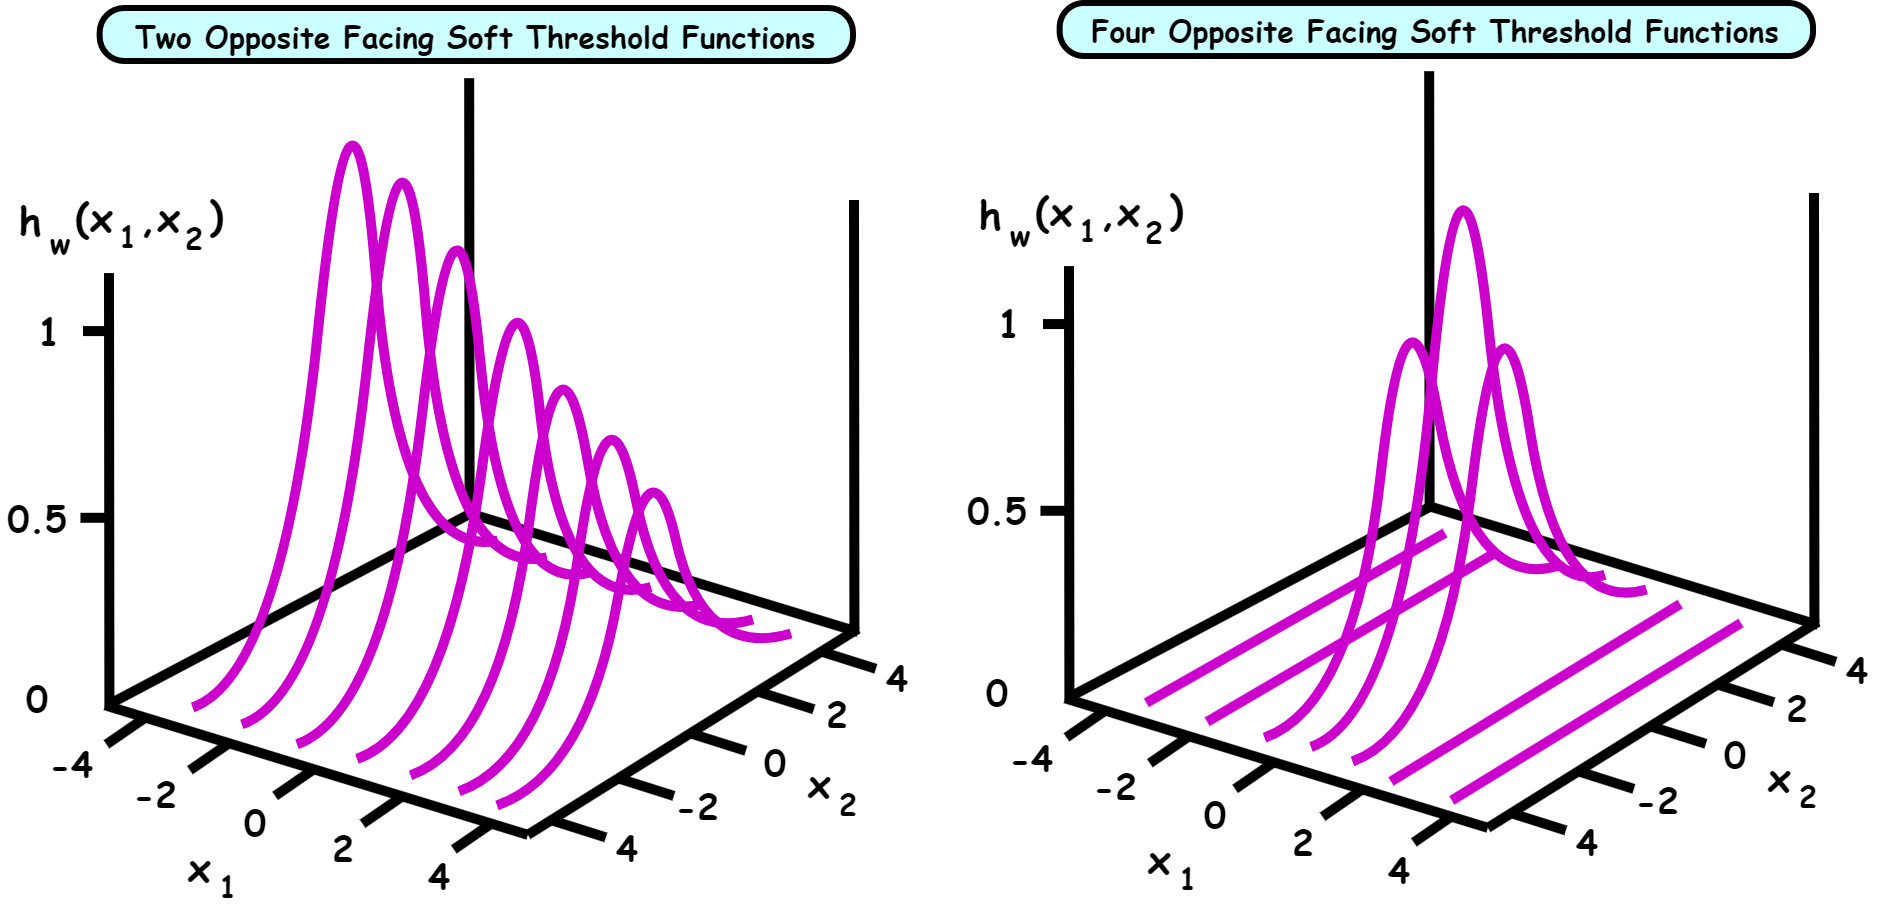

The visualization shows how multiple sigmoid units create sophisticated decision boundaries:
- Two opposing thresholds form ridge-like boundaries
- Four perpendicular thresholds create localized peaks

Each hidden unit contributes a smooth threshold oriented differently. Combined through weighted connections, these create intricate decision surfaces impossible for single-layer networks.

### **Matrix Representation**

For our specific example network, the complete flow from input to output:

**Input Layer:**
$\begin{bmatrix} a_1 \\ a_2 \end{bmatrix} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$

**Hidden Layer:**
$\begin{bmatrix} a_3 \\ a_4 \end{bmatrix} = \sigma\left(\begin{bmatrix} w_{13} & w_{23} \\ w_{14} & w_{24} \end{bmatrix} \begin{bmatrix} a_1 \\ a_2 \end{bmatrix} + \begin{bmatrix} w_{33} \\ w_{44} \end{bmatrix}\right)$

**Output Layer:**
$a_5 = \sigma\left(\begin{bmatrix} w_{35} & w_{45} \end{bmatrix} \begin{bmatrix} a_3 \\ a_4 \end{bmatrix} + w_{55}\right)$

Where weights w₃₃, w₄₄, w₅₅ represent bias terms for units 3, 4, and 5 respectively.

### **Forward Propagation Process**

Information transforms through successive layers:
1. **Input:** (a₁, a₂) = (x₁, x₂)
2. **Hidden:** a₃ = σ(w₁₃a₁ + w₂₃a₂ + w₃a₃), a₄ = σ(w₁₄a₁ + w₂₄a₂ + w₄a₄)  
3. **Output:** a₅ = σ(w₃₅a₃ + w₄₅a₄ + w₅a₅)

### **Loss Function for Learning**

The loss function quantifies prediction errors by measuring differences between network outputs and target values:

$Loss(w) = \frac{1}{2m} \sum_{k=1}^{m} (y_k - a_k)^2$

**Purpose of Loss Function**
- **Learning objective:** Provides a concrete goal for the network to minimize prediction errors
- **Weight optimization:** Enables gradient calculation to determine how each weight should change
- **Performance measurement:** Quantifies how well the network performs on training data
- **Training guidance:** Gives direction for parameter updates during learning

### **Gradient Descent Training**

The gradient descent algorithm finds optimal weights by:

$\frac{\partial}{\partial w} Loss(w) = \frac{\partial}{\partial w} \frac{1}{2m} \sum_{k=1}^{m} (y_k - a_k)^2 = \frac{1}{m} \sum_{k=1}^{m} \frac{\partial}{\partial w} (y_k - a_k)^2$

Weight updates follow: $w \leftarrow w - \alpha \frac{\partial Loss}{\partial w}$

Computing gradients requires the chain rule to backpropagate error signals through network layers, enabling efficient training of deep architectures for non-linearly separable problems.

---

### **Backpropagation Algorithm**

Backpropagation efficiently computes gradients for all weights in multi-layer neural networks by propagating error signals backward from output to input layers.

#### **Core Principle**

The algorithm uses the chain rule of calculus to compute how each weight contributes to the overall loss. Error signals flow backward through the network, allowing simultaneous weight updates across all layers.

#### **Two Weight Update Rules**

Backpropagation requires different formulas depending on the layer position:

**1. Hidden-to-Output Layer Weights:**
$$\Delta_k \leftarrow (y_k - a_k)g'(in_k)$$
$$w_{j,k} \leftarrow w_{j,k} + \alpha \times a_j \times \Delta_k$$

**2. Input/Hidden-to-Hidden Layer Weights:**
$$\Delta_j \leftarrow g'(in_j) \sum_k w_{j,k} \Delta_k$$
$$w_{i,j} \leftarrow w_{i,j} + \alpha \times a_i \times \Delta_j$$

Where:
- $\Delta$ represents the error signal (delta value)
- $g'(in)$ is the activation function derivative
- $\alpha$ is the learning rate
- $a$ represents the activation value
- $w_{i,j}$ is the weight from unit $i$ to unit $j$

#### **Algorithm Steps**

The backpropagation process follows these sequential steps:

1. **Forward Pass:** Compute activations for all layers from input to output
2. **Compute Output Deltas:** Calculate $\Delta$ values for output units using observed error
3. **Backward Propagation:** For each layer from output to first hidden layer:
   - Propagate $\Delta$ values back to the previous layer
   - Update weights between the current and previous layers

#### **Mathematical Foundation**

The delta values represent partial derivatives of the loss function:

$$\Delta_j = \frac{\partial Loss}{\partial in_j}$$

For output units:
$$\Delta_k = \frac{\partial Loss}{\partial a_k} \times \frac{\partial a_k}{\partial in_k} = -(y_k - a_k) \times g'(in_k)$$

For hidden units:
$$\Delta_j = \frac{\partial a_j}{\partial in_j} \sum_k \frac{\partial Loss}{\partial in_k} = g'(in_j) \sum_k w_{j,k} \Delta_k$$

#### **Activation Function Derivative**

For sigmoid activation $g(z) = \frac{1}{1 + e^{-z}}$:

$$g'(z) = g(z)(1 - g(z))$$

This convenient property allows efficient computation since $g(z)$ is already calculated during forward propagation.

#### **Weight Update Process**

The gradient descent weight update becomes:

$$w_{i,j} \leftarrow w_{i,j} - \alpha \frac{\partial Loss}{\partial w_{i,j}}$$

Since $\frac{\partial Loss}{\partial w_{i,j}} = -a_i \Delta_j$, this simplifies to:

$$w_{i,j} \leftarrow w_{i,j} + \alpha \times a_i \times \Delta_j$$

#### **Computational Efficiency**

Backpropagation's key advantage is computing all weight gradients in a single backward pass, making it $O(W)$ where $W$ is the number of weights. This efficiency enables training of deep networks with millions of parameters.

#### **Layer Dependency**

Computing updates for earlier layers requires delta values from deeper layers. This creates a dependency chain where:
- Output layer deltas depend only on prediction errors
- Hidden layer deltas depend on weighted sums of subsequent layer deltas
- Weight updates use local activations and propagated deltas

This backward flow of error information gives the algorithm its name and enables effective learning in multi-layer architectures.

---

### **Supervised Machine Learning: Algorithm Comparison**

Neural networks represent one approach among many supervised learning methods, each with distinct characteristics and optimal use cases.

#### **Algorithm Classification Framework**

Machine learning algorithms can be categorized across three key dimensions:

**1. Model Complexity**
- **Parametric:** Fixed number of parameters (independent of training data size)
- **Non-parametric:** Parameters grow with training data complexity

**2. Function Type**
- **Linear:** Creates linear decision boundaries
- **Non-linear:** Capable of complex, curved decision boundaries

**3. Output Type**
- **Discrete:** Classification tasks with categorical outputs
- **Continuous:** Regression tasks with numerical outputs

#### **Algorithm Comparison Table**

| Algorithm | Model Type | Function Type | Output Type | Ideal Applications |
|-----------|------------|---------------|-------------|-------------------|
| **Decision Trees** | Non-parametric | Non-linear | Discrete | Medical diagnosis, loan approval, rule extraction where interpretability is crucial |
| **Naïve Bayes** | Parametric | Linear | Discrete | Text classification, spam detection, sentiment analysis with categorical features |
| **K-Nearest Neighbor** | Non-parametric | Non-linear | Discrete | Recommendation systems, pattern recognition, anomaly detection with local similarities |
| **Perceptron** | Parametric | Linear | Discrete | Simple binary classification, linearly separable problems, real-time applications |
| **Multi-layer Neural Network** | Parametric | Non-linear | Discrete | Image recognition, natural language processing, complex pattern recognition |
| **Linear Regression** | Parametric | Linear | Continuous | Price prediction, trend analysis, risk assessment with linear relationships |

### **Detailed Algorithm Characteristics**

**Decision Trees**
- **Strengths:** Highly interpretable, handles mixed data types, no assumptions about data distribution
- **Applications:** Credit scoring, medical diagnosis systems, feature selection
- **When to use:** Need transparent decision-making process

**Naïve Bayes**
- **Strengths:** Fast training/prediction, works well with small datasets, handles multiple classes naturally
- **Applications:** Email spam filtering, document classification, real-time text analysis
- **When to use:** Text data with strong independence assumptions

**K-Nearest Neighbor (KNN)**
- **Strengths:** Simple concept, effective for local patterns, no training phase required
- **Applications:** Product recommendations, image recognition, outlier detection
- **When to use:** Local similarity matters more than global patterns

**Perceptron**
- **Strengths:** Fast, simple, good baseline for linear problems
- **Applications:** Simple binary classification, online learning, embedded systems
- **When to use:** Linearly separable data with computational constraints

**Multi-layer Neural Networks**
- **Strengths:** Universal function approximation, handles complex non-linear relationships
- **Applications:** Computer vision, speech recognition, game playing, autonomous systems
- **When to use:** Complex patterns, large datasets, computational resources available

**Linear Regression**
- **Strengths:** Interpretable coefficients, well-understood statistics, fast computation
- **Applications:** Sales forecasting, economic modeling, scientific relationship analysis
- **When to use:** Linear relationships, continuous predictions, statistical inference needed

---

### **Worked Example: Neural Network Classification and Learning**

The image represents a feed-forward neural network with one hidden layer and a single output neuron used for binary classification. The activation function used at neurons 3, 4, and 5 is the sigmoid function. From left to right:

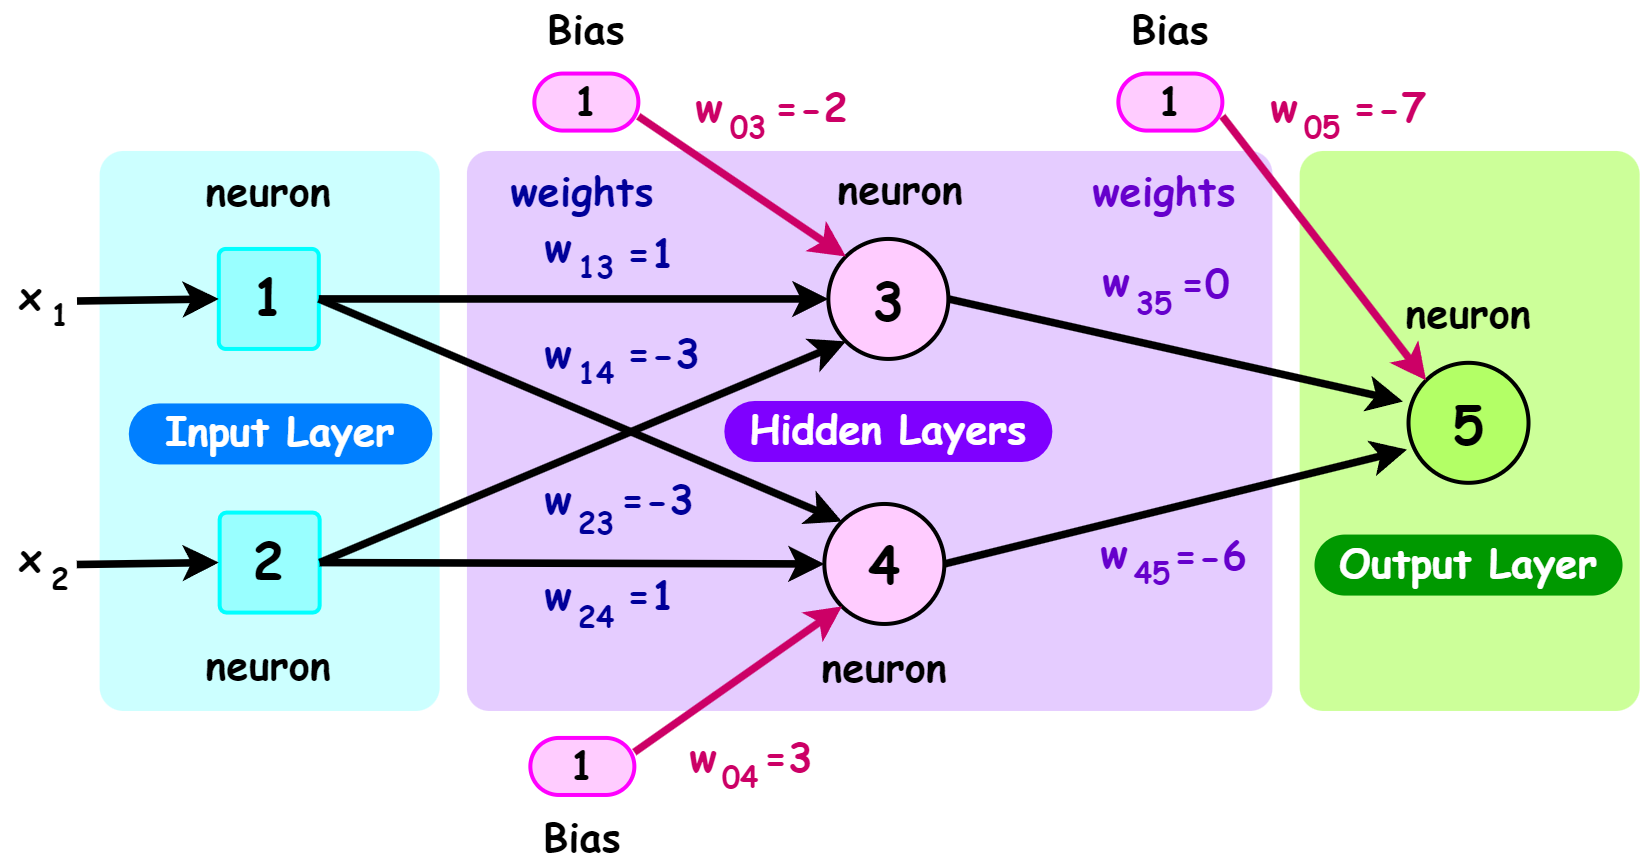

**Classification Rule**

The output at neuron 5 will be a value between 0 and 1. Use a decision boundary of 0.5 to determine the predicted class:
- If output ≥ 0.5: predicted class = 1
- If output < 0.5: predicted class = 0

#### **Tasks 1:**

Show how the network classifies the input x = (x₁ = 1, x₂ = 0) with corresponding class label 1.


$$a_j = g(in_j) = g(\mathbf{w}_j \cdot \mathbf{a}) = g(\sum_{i=0}^{n} w_{i,j} a_i)$$

**Feed Forward Process Step 1: Calculate the Weighted Sum for Each Neuron's Input Function**

$$\text{Input Function} = \sum_{i=0}^{n} w_{i,j} a_i$$

Weighted Sum for Neuron 3 Input Function:

$$input_{3} = w_{13}a_{1} + w_{23}a_{2} + \text{Bias}$$
$$input_{3} = w_{13}a_{1} + w_{23}a_{2} + w_{03}$$
$$input_{3} = (1)(1) + (-3)(0) + (-2)(1)$$
$$input_{3} = -1$$


Weighted Sum for Neuron 4 Input Function:

$$input_{4} = w_{14}a_{1} + w_{24}a_{2} + \text{Bias}$$
$$input_{4} = w_{14}a_{1} + w_{24}a_{2} + w_{04}$$
$$input_{4} = (-3)(1) + (1)(0) + (3)(1)$$
$$input_{4} = 0$$

**Feed Forward Process Step 2: Calculate the Activation Function**

$$\text{Activation Function} = g(\sum_{i=0}^{n} w_{i,j} a_i)$$
$$where,$$
$$\text{Sigmode Function} = g(x) = \frac{1}{1 + e^{-x}}$$
$$x = input_{neuron}$$

Activation Function for Neuron 3:

$$a_{3} = g(input_{3}) = \frac{1}{1 + e^{-input_{3}}}$$
$$a_{3} = \frac{1}{1 + e^{-(-1)}}$$
$$a_{3} = \frac{1}{1 + e}$$

Activation Function for Neuron 4:

$$a_{4} = g(input_{4}) = \frac{1}{1 + e^{-input_{4}}}$$
$$a_{4} = \frac{1}{1 + e^{-(0)}}$$
$$a_{4} = \frac{1}{2}$$

**Feed Forward Process Step 3: Calculate the Weighted Sum for Neuron 5 Input Function**

$$input_{5} = w_{35}a_{3} + w_{45}a_{4} + \text{Bias}$$
$$input_{5} = w_{35}a_{3} + w_{45}a_{4} + w_{05}$$
$$input_{5} = (0)(\frac{1}{1 + e}) + (-6)(\frac{1}{2}) + (-7)(1)$$
$$input_{5} = -10$$

**Feed Forward Process Step 4: Calculate the Activation Function for Neuron 5**

$$a_{5} = g(input_{5}) = \frac{1}{1 + e^{-input_{5}}}$$
$$a_{5} = \frac{1}{1 + e^{-(-10)}}$$
$$a_{5} =  \frac{1}{1 + e^{10}}$$

**Feed Forward Process Step 5: Classify the Results**

$$a_{5} =  \frac{1}{1 + e^{10}} < 0.5 \text{: predicted class = 0}$$

**Answers:** $a_{5} < 0.5$, The Predicated Class is **Class 0** Based on the Classfication Rule.

<br>

**Task 2:** Using the gradient descent update rules with learning rate α = 0.1, show how w₀,₃, w₃,₅, w₂,₄ would be updated if the neural network was being trained.

**Note:** The derivative of the sigmoid function is given by g'(x) = g(x)(1 - g(x)).

